In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# First thing to do is read in the titanic dataset and perform exploratory data analysis

In [197]:
titanic_train = pd.read_csv('titanic-train.csv')
titanic_test = pd.read_csv('titanic-test.csv')
print(titanic_train.shape)
print(titanic_test.shape)

(891, 12)
(418, 11)


In [198]:
# saw lots of NaNs. Need to replace with empty string
print(titanic_train.columns[titanic_train.isna().any()].tolist())
print(titanic_test.columns[titanic_test.isna().any()].tolist())

['Age', 'Cabin', 'Embarked']
['Age', 'Fare', 'Cabin']


In [199]:
titanic_train['Age'] = titanic_train['Age'].fillna(0.0)
titanic_train['Cabin'] = titanic_train['Cabin'].fillna('')
titanic_train['Embarked'] = titanic_train['Embarked'].fillna('')
titanic_test['Age'] = titanic_test['Age'].fillna(0.0)
titanic_test['Cabin'] = titanic_test['Cabin'].fillna('')
titanic_test['Fare'] = titanic_test['Fare'].fillna(0.0)
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,,S


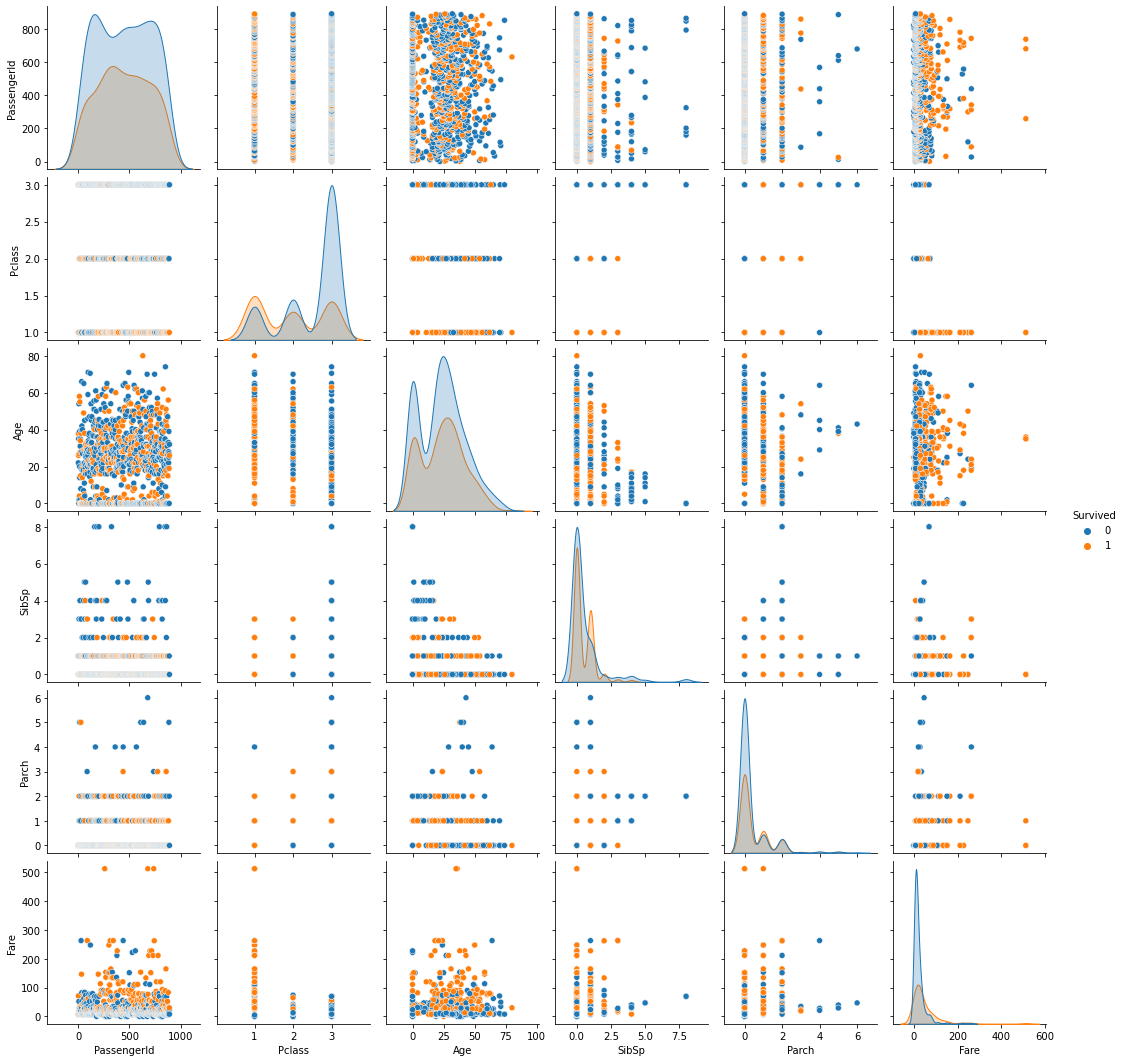

In [200]:
#visualize the data
sns.pairplot(titanic_train, hue='Survived')

# Create a kde plot of class versus survived for males


C:\Anaconda\envs\PythonAdv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Anaconda\envs\PythonAdv\lib\site-packages\seaborn\distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

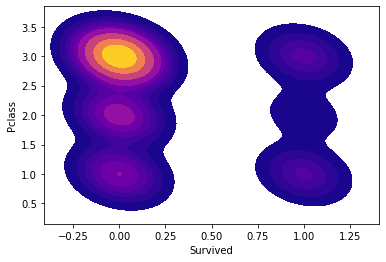

In [201]:
males = titanic_train[titanic_train['Sex']=='male']
sns.kdeplot(males['Survived'], males['Pclass'],cmap='plasma', shade=True, shade_lowest=False)

# Need to encode categorical features and clean up data

In [202]:
from sklearn.preprocessing import OneHotEncoder

In [203]:
#show data types of the columns to figure out which ones are categorical
print(titanic_train.dtypes)
print(titanic_test.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [204]:
# drop unnecessary columns in train and test data sets

# titanic_train = titanic_train.drop(columns=['Name', 'Ticket', 'Cabin', 'Embarked'])
# titanic_test = titanic_test.drop(columns=['Name', 'Ticket', 'Cabin', 'Embarked'])

In [205]:
#Replace male/female with 1 for male or 2 for female
# titanic_train['Sex'] = np.where(titanic_train['Sex']=='male', 1,2)
# titanic_test['Sex'] = np.where(titanic_test['Sex']=='male', 1,2)
# titanic_train.head()

In [206]:
#Use one hot encoding to encode categorical features

cat_features_train = titanic_train.select_dtypes(include=['object']).columns.tolist()
cat_features_test = titanic_test.select_dtypes(include=['object']).columns.tolist()
encoder_train = OneHotEncoder(sparse=False)
encoder_test = OneHotEncoder(sparse=False)
encoded_train = encoder_train.fit_transform(titanic_train[cat_features_train])
encoded_test = encoder_test.fit_transform(titanic_test[cat_features_test])
encoded_trained_df = pd.DataFrame(encoded_train, columns=encoder_train.get_feature_names(cat_features_train))
encoded_test_df = pd.DataFrame(encoded_test, columns=encoder_test.get_feature_names(cat_features_test))                                     
titanic_train = pd.concat([titanic_train, encoded_trained_df],axis=1)
titanic_train = titanic_train.drop(cat_features_train,axis=1)
titanic_test = pd.concat([titanic_test, encoded_test_df],axis=1)
titanic_test = titanic_test.drop(cat_features_test,axis=1)

# Train the model

In [207]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [208]:
X = titanic_train.drop('Survived', axis=1)
y = titanic_train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3)
print(X_train.shape)
print(y_train.shape)
X_test_df = titanic_test

(623, 1732)
(623,)


In [209]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

# Evaluate the SVC Model

In [210]:
predictions = svc_model.predict(X_test)

In [211]:
from sklearn.metrics import classification_report, confusion_matrix

In [212]:
print(confusion_matrix(y_test, predictions))

[[160   6]
 [ 89  13]]


In [213]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.64      0.96      0.77       166
           1       0.68      0.13      0.21       102

    accuracy                           0.65       268
   macro avg       0.66      0.55      0.49       268
weighted avg       0.66      0.65      0.56       268



# Try Gridsearch

In [214]:
from sklearn.model_selection import GridSearchCV

In [215]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

In [216]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................... C=0.1, gamma=1, total=   0.5s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ................................... C=0.1, gamma=1, total=   0.5s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.6s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.5s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.6s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.5s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.5s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.5s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[CV] ................................ C=10, gamma=0.001, total=   0.4s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.5s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.5s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.5s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.5s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.5s
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total=   0.5s
[CV] C=100, gamma=0.1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   41.2s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [217]:
grid_predictions = grid.predict(X_test)

In [218]:
print(confusion_matrix(y_test, grid_predictions))

[[150  16]
 [ 77  25]]


In [219]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.66      0.90      0.76       166
           1       0.61      0.25      0.35       102

    accuracy                           0.65       268
   macro avg       0.64      0.57      0.56       268
weighted avg       0.64      0.65      0.61       268

